<a href="https://colab.research.google.com/github/catavasia/ML_FIAN2020/blob/master/MLatFIAN2020_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np


from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [ ]:
from sklearn.model_selection import cross_validate

[-37.0377786  -37.11774393 -37.16558524 -32.27171172 -34.86513801
 -33.15649455 -36.03550311 -29.28421474 -35.07201188 -36.98082811]
[-14.92358959 -14.14984998  -9.67965945 -83.31296799 -43.76747461
 -73.29667255 -22.17394835 -84.71392611 -34.95685194 -14.32935861]


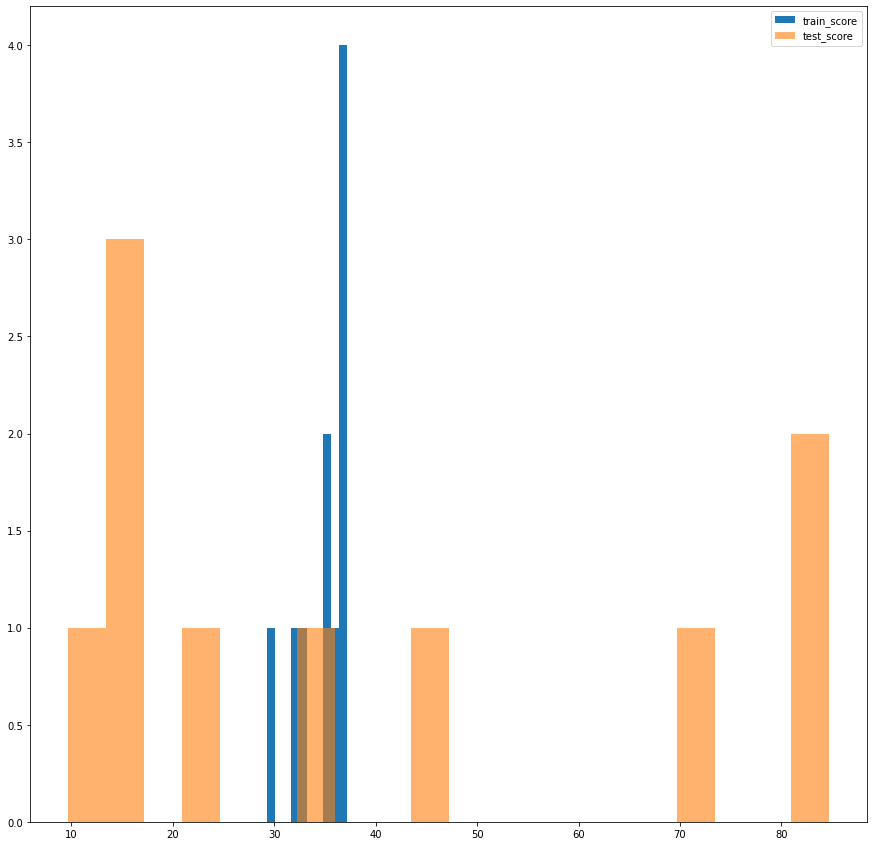

In [64]:
ridge = linear_model.Ridge(alpha=5)
results = cross_validate(ridge, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score = True)
#print(results)
plt.figure(figsize=(15, 15))
plt.hist(-results['train_score'], label = 'train_score', bins=10)
plt.hist(-results['test_score'], alpha=0.6, label = 'test_score', bins=20)
plt.legend()
print(results['train_score'])
print(results['test_score'])

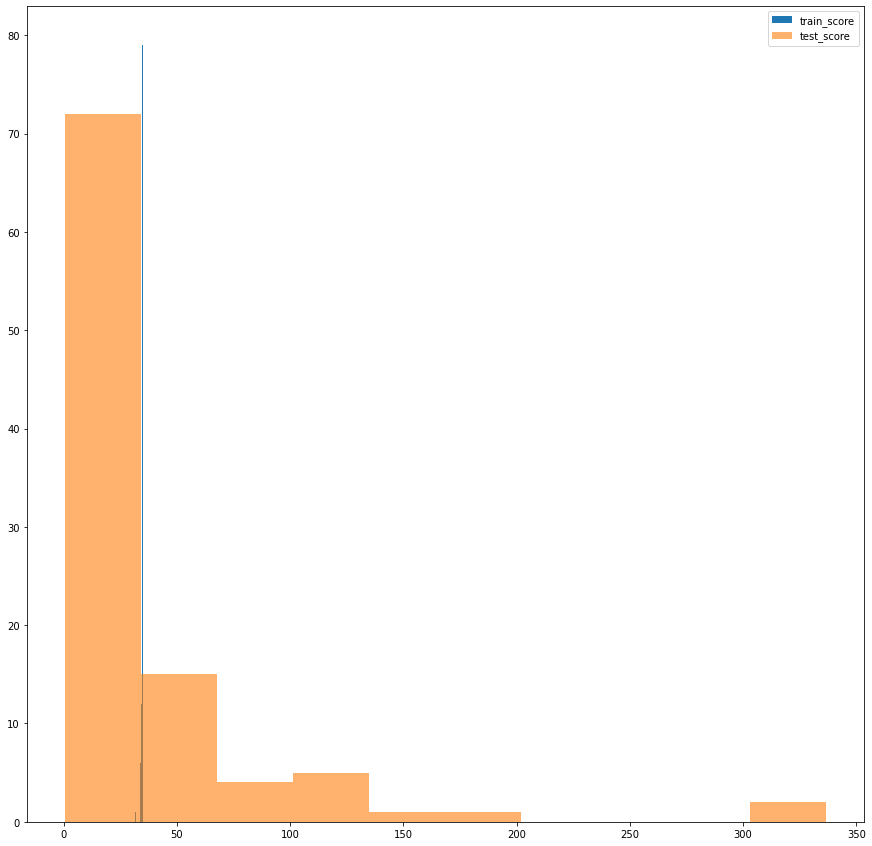

In [63]:
ridge = linear_model.Ridge(alpha = 5)
results = cross_validate(ridge, X, y, cv=100, scoring='neg_mean_squared_error', return_train_score = True)
#print(results)
plt.figure(figsize=(15, 15))
plt.hist(-results['train_score'], label = 'train_score')
plt.hist(-results['test_score'], alpha=0.6, label = 'test_score')
plt.legend()
#print(results['train_score'])
#print(results['test_score'])